# Data Science Pipeline using Scikit Learn

# 1 EDA, DATA VIZUALIZATION
# 2 MODEL BUILDING
# 3 Dimensionality Reduction
# 4 CrossValidation
# 5 Pipeline

# Import Standard Tools Pandas, Scikit, Numpy, Scipy, Matplotlib

In [3]:
#NOTES
#Data Analysis PANDAS
#Machine Learning SCIKIT LEARN
#VIZUALIZATION Matplotlib, Seaborn, Pandas
#Math, Linear Algebra, Matrix - Numpy and Scipy


import pandas as pd
import sklearn as sk
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics")))

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
plt.style.use('ggplot')
%matplotlib inline


'''
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
'''



'\nimport statsmodels.api as sm\nimport statsmodels.formula.api as smf\nimport seaborn as sns\n'

# Read the file, show some output

In [7]:
# Iris Dataset is a MultiClass Classification Example
# 3 types : 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
# 150 examples 
#


iris_filename = './datasets-uci-iris.csv'

#Task :  read iris dataset to a dataframe named iris 
iris = pd.read_csv(iris_filename, header=None, names= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

#iris is of the DataFrame Class
print("type of object iris is %s" % type(iris))
print("")
print("")

#print the first few rows
print("Print the first few rows")
print(iris.head())


print("")
print("")


#print the last few rows
print("Print the last few rows")
print(iris.tail())

type of object iris is <class 'pandas.core.frame.DataFrame'>


Print the first few rows
   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Print the last few rows
     sepal length  sepal width  petal length  petal width          target
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


# Exploratory Data Analysis EDA

In [8]:
#Compute some column based statistics
#Note: Only computes numerical statistics for columns with numerical data , target column is ignored 
#use the Pandas DataFrame's describe method

print("Column Based Statistics")
iris.describe()

Column Based Statistics


       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

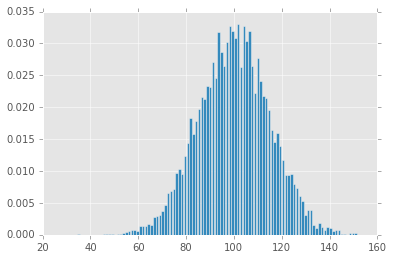

In [9]:
#Plot Example of a Probability Distribution Using Numpy and MatplotLIB

#GENERATE 10000 random numbers with mean 100 and stdDEV 15
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

#Create Histogram
hist, bins = np.histogram(x, bins=100)

#Do some groundwork and plot using Matplotlib
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist/sum(hist), align='center', width=width)
plt.show()

[ 0.08333333  0.          0.25        0.33333333  0.          0.25
  0.66666667  0.41666667  0.75        1.16666667  0.          0.83333333
  2.16666667  1.          0.          1.08333333  0.5         1.          0.5
  0.25        0.          0.25        0.5         0.16666667  0.
  0.08333333  0.08333333  0.08333333  0.          0.08333333]


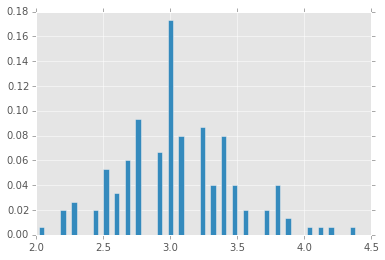

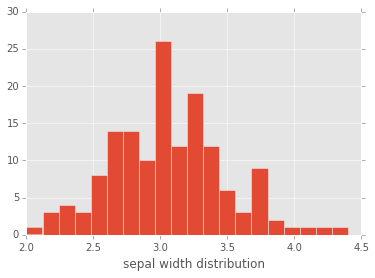

In [13]:
#Density Plot 

#Consider the column "sepal length"
#plot the Probability Density and visulize the data distribution 
#Function to use: NUMPY's Histogram Function and MatplotLib's plt (bar, show)


hist, bins = np.histogram(iris["sepal width"].values, bins=30,density=True)
print(hist)
width = 0.5 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center,hist/sum(hist), align='center', width=width)
plt.show()


#histogram of a given column

plt.hist(iris['sepal width'], bins=20)
plt.xlabel("sepal width distribution")
plt.show()

In [15]:
#Lets check the target value distribution
#how many unique types do we have ???
#what is the distribution

#print the unique values in the target column?
#use the function: DataFrame's unique()

print(iris.target.unique())
print()
print()

#print the counts of values of each unique value in the target column?
#function DataFrame's value_counts()
print(iris.target.value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
dtype: int64


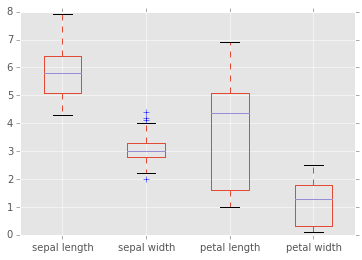

In [16]:
#BOX PLOT 
'''
5-number SUMMARY 

The box plot (a.k.a. box and whisker diagram) is a 
standardized way of displaying the distribution of 
data based on the five number summary: 
minimum, first quartile, median, third quartile, and maximum

'''


retval=iris.boxplot(return_type='dict')

#NOTE
#retval and return_type='dict' to suppress return type printout and warning messages due to python version

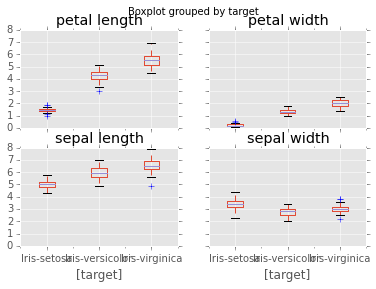

In [17]:
#BOX PLOT Grouped by Other COLUMN

#WHICH FEATURE CAN HELP ME CLASSIFY THE BEST ??????????

retval=iris.boxplot(return_type='dict',by="target")

In [18]:
#Print some quantile information 10% , 90%

#Use DataFrame's Quantile Function
#iris.quantile(list of qunatile)

#the .1 and .9 qunatiles
iris.quantile([0.1, 0.9])

#the 0.1 0.5 0.9 quantiles
iris.quantile([0.1, 0.5, 0.9])

     sepal length  sepal width  petal length  petal width
0.1           4.8         2.50          1.40          0.2
0.5           5.8         3.00          4.35          1.3
0.9           6.9         3.61          5.80          2.2

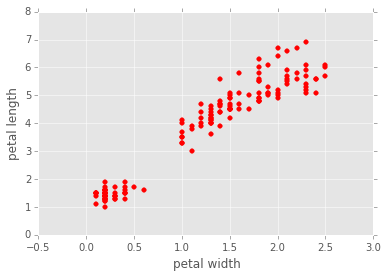

In [19]:

#Scatter Plot to see the relationship between 2 variables/features (Numerical Only)

plt.scatter(iris['petal width'], iris['petal length'], alpha=1.0, color='r')
plt.xlabel("petal width")
plt.ylabel("petal length")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fb5c3b048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3fb58600f0>]], dtype=object)

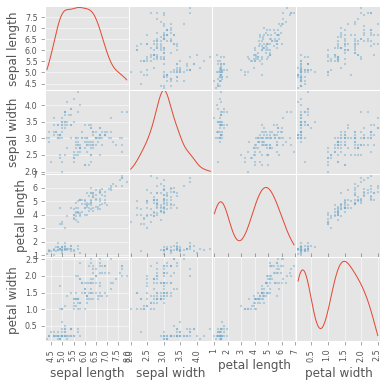

In [20]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris, alpha=0.4, figsize=(6, 6), diagonal='kde')


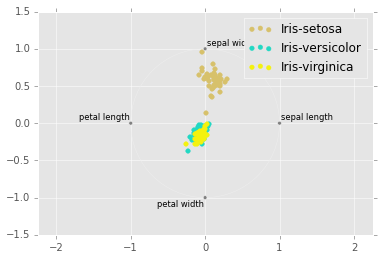

In [21]:
'''

RadViz is a way of visualizing multi-variate data. 
It is based on a simple spring tension minimization algorithm. 
Basically you set up a bunch of points in a plane. In our case 
they are equally spaced on a unit circle. Each point represents 
a single attribute. You then pretend that each sample in the 
data set is attached to each of these points by a spring, 
the stiffness of which is proportional to the numerical value
of that attribute (they are normalized to unit interval). 
The point in the plane, where our sample settles to 
(where the forces acting on our sample are at an equilibrium) 
is where a dot representing our sample will be drawn. 
Depending on which class that sample belongs it will be colored differently.

Also consider t-sne - 2-dim viz of high-dimensional data
'''
from pandas.tools.plotting import radviz

radviz(iris, 'target')


# MultiClass Classifier

In [22]:
#Building a MultiClass Classifier 

#iris data
#shape of the input data matrix : 150*5 Matrix 
print("Shape of Iris Data Matrix is %s " % (iris.shape,))

#Task 1: What is it that we want to Predict :   iris.target
#Lets break data into X and Y where X is input feature matrix and Y is target
Y= iris.target
X= iris.drop(["target"],axis=1)

print("Shapes of X and Y are %s %s " %(X.shape,Y.shape,))

Shape of Iris Data Matrix is (150, 5) 
Shapes of X and Y are (150, 4) (150,) 


In [24]:
#Task 2
#Creating Training and Testing Data 
'''
 Training data is used to create a ML Model. However, the model is evaluated on the Test data.
 We are interested in how our model does on unseen data, i.e., the test data and not the train data
 on which the model was trained.
 
 60% of data is used for training the model.
 40% of data is used to evaluate the model using test data.

'''

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=4)

print("Shapes of Training Data is %s %s " %(X_train.shape,Y_train.shape,))

print("Shapes of Testing Data is %s %s " %(X_test.shape,Y_test.shape,))

Shapes of Training Data is (90, 4) (90,) 
Shapes of Testing Data is (60, 4) (60,) 


In [40]:
#Task 3
#Build Model on Training Data and Evaluate It 

#Decision Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#init a DecisionTressClassifier object
classifier = DecisionTreeClassifier(max_depth=3)

#fit the training data
classifier.fit(X_train, Y_train) 

#predict on training data
train_pred = classifier.predict(X_train)

#predict on test data 
test_pred = classifier.predict(X_test)






In [41]:
# how many predictions did we get right, Accuracy 

from sklearn import metrics
print( "Train Accuracy:", metrics.accuracy_score(Y_train, train_pred))
print( "Test Accuracy:", metrics.accuracy_score(Y_test, test_pred))



Train Accuracy: 0.977777777778
Test Accuracy: 0.966666666667


In [42]:
# Confusion Matrix is used to compute TruePos, FalsePos, TrueNeg, FalseNeg
#This can be used to compute metrics like Precision, Recall, F1-Score which
#are used to report classifier performance 

cmTest = metrics.confusion_matrix(Y_test, test_pred)
cmTrain = metrics.confusion_matrix(Y_train, train_pred)

print("Confusion Matrix for Training Data")
print(cmTrain)

print("Confusion Matrix for Test Data")
print(cmTest)


Confusion Matrix for Training Data
[[25  0  0]
 [ 0 32  1]
 [ 0  1 31]]
Confusion Matrix for Test Data
[[25  0  0]
 [ 0 17  0]
 [ 0  2 16]]


In [43]:
#of the items we predicted to belong to a class C, how many did we get right
print ("Precision:", metrics.precision_score(Y_test, test_pred, average='weighted'))

#of the items which belong to class C, how many did we get right
print ("Recall:", metrics.recall_score(Y_test, test_pred, average='weighted'))

# a single number to represent performance, F1_Score = (2PR/(P+R))
print ("F1 Score:", metrics.f1_score(Y_test, test_pred, average='weighted'))


Precision: 0.970175438596
Recall: 0.970175438596
F1 Score: 0.970175438596


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl

In [44]:
#Recall, we started with 4 features ?
#what are the most important features
#in ScikitLearn, you can find feature importances

print(X.columns)
print(classifier.feature_importances_)

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')
[ 0.          0.          0.55468897  0.44531103]


In [46]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  

with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(classifier, out_file=f)
    
#Convert dot to pdf
#dot -Tpdf iris.dot -o iris.pdf






'''
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  
'''

'\ndot_data = StringIO()  \ntree.export_graphviz(clf, out_file=dot_data,  \n                         feature_names=iris.feature_names,  \n                         class_names=iris.target_names,  \n                         filled=True, rounded=True,  \n                         special_characters=True)  \ngraph = pydot.graph_from_dot_data(dot_data.getvalue())  \nImage(graph.create_png())  \n'

# Dimensionality Reduction 

In [47]:
#lets reduce iris dataset dimensionality to 2 from 4 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,Normalizer

#Step 1: Normalize Numerical Data Columns
#PCA requires all columns to be scaled to a similar range (Preprocessing)
#Normalizer Normalize samples individually to unit norm.
scaler=Normalizer()
Xscaled=scaler.fit_transform(X)
print(Xscaled[0:5,:])



[[ 0.80377277  0.55160877  0.22064351  0.0315205 ]
 [ 0.82813287  0.50702013  0.23660939  0.03380134]
 [ 0.80533308  0.54831188  0.2227517   0.03426949]
 [ 0.80003025  0.53915082  0.26087943  0.03478392]
 [ 0.790965    0.5694948   0.2214702   0.0316386 ]]
[ 0.96210389  0.02788074]


In [56]:
#Check what Normalizer does, makes each feature vector's L2 Norm == 1 
def compL2Norm(data):
    return np.linalg.norm(data)

#apply function compL2Norm to each feature vector
normValues = pd.DataFrame(Xscaled).apply(compL2Norm,axis=1)

print(normValues)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
      ..
140    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
dtype: float64


In [48]:
#Step 2 : Do PCA
pca = PCA(n_components=2)
pca.fit(Xscaled)

#What fraction of information is contained 
print(pca.explained_variance_ratio_) 



[ 0.96210389  0.02788074]


In [51]:
#Suppose we did not NORMALIZE ??? We explain less variance 

pcaUnNorm = PCA(n_components=2)
pcaUnNorm.fit(X)

#What fraction of information is contained 
print(pcaUnNorm.explained_variance_ratio_) 

[ 0.92461621  0.05301557]


In [57]:
#Step 3: Get a new dataset with reduced dimensions
Xreduced = pca.transform(X)
print(Xreduced.shape)



(150, 2)


In [58]:
#Step 4: Build Classifier on this new low-dim dataset
classifier = DecisionTreeClassifier(max_depth=2)

#get train/test data using Xreduced and Y
X_train, X_test, Y_train, Y_test = train_test_split(Xreduced, Y, test_size=0.40, random_state=4)
print("Shapes of Training Data is %s %s " %(X_train.shape,Y_train.shape,))

print("Shapes of Testing Data is %s %s " %(X_test.shape,Y_test.shape,))

#fit
classifier.fit(X_train, Y_train) 

#predict
train_pred = classifier.predict(X_train)
test_pred = classifier.predict(X_test)


from sklearn import metrics
print( "Train Accuracy:", metrics.accuracy_score(Y_train, train_pred))
print( "Test Accuracy:", metrics.accuracy_score(Y_test, test_pred))


print ("Precision:", metrics.precision_score(Y_test, test_pred, average='weighted'))
print ("Recall:", metrics.recall_score(Y_test, test_pred, average='weighted'))
print ("F1 Score:", metrics.f1_score(Y_test, test_pred, average='weighted'))

Shapes of Training Data is (90, 2) (90,) 
Shapes of Testing Data is (60, 2) (60,) 
Train Accuracy: 0.988888888889
Test Accuracy: 0.966666666667
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl

# CrossValidation

In [60]:
#CV : Our training data is small. We used 60-40 train/test split. Lets use CV. Technique to create more number of datasets 
#small sized data set 

from sklearn.cross_validation import KFold

kf = KFold(X.shape[0], n_folds=5)
print(X.shape,Y.shape)
print(type(X))

for train_index, test_index in kf:
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
    print()

(150, 4) (150,)
<class 'pandas.core.frame.DataFrame'>
TRAIN: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
(120, 4) (30, 4) (120,) (30,)

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 1

In [61]:
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation

#what model to use 
clf=DecisionTreeClassifier(max_depth=2)

#compute CV dataset score and the mean
scores = cross_validation.cross_val_score(clf,X,Y, cv=5)
print(scores , np.mean(scores))

[ 0.93333333  0.96666667  0.9         0.86666667  1.        ] 0.933333333333


# Pipelines: Automate and Do it at one go !!

In [74]:
#Build a Pipeline of steps 
#Normalizer , PCA , DecisionTree 
#Eval

#Scikit Learn provides great functionality to build ML Pipelines
#Define Pipeline

from sklearn import grid_search
from sklearn import pipeline

scalerP=Normalizer()
pcaP = PCA(n_components=2)
clfP = DecisionTreeClassifier(max_depth=2)
clf = pipeline.Pipeline([('Norm', scalerP),('PCA', pcaP),("model",clfP)])



In [75]:

param_grid = {}  
model = grid_search.GridSearchCV(estimator = clf,param_grid=param_grid, verbose=10,
                                 n_jobs=-1, iid=True, refit=True, cv=2)  
model.fit(X, Y)
print("Best score: %0.3f" % model.best_score_)
print("Best parameters set:")


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best score: 0.980
Best parameters set:
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................................... , score=0.973333 -   0.0s
[CV] ....................................... , score=0.986667 -   0.0s


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished


In [76]:
best_parameters = model.best_estimator_.get_params()
best_model = model.best_estimator_
best_model.fit(X,Y)
preds = best_model.predict(X_test)

print( "Test Accuracy:", metrics.accuracy_score(Y_test, test_pred))
print ("Precision:", metrics.precision_score(Y_test, test_pred, average='weighted'))
print ("Recall:", metrics.recall_score(Y_test, test_pred, average='weighted'))
print ("F1 Score:", metrics.f1_score(Y_test, test_pred, average='weighted'))

Test Accuracy: 0.966666666667
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl

In [81]:
#DO REAL GRID SEARCH 

scalerP=Normalizer()
pcaP = PCA()
clfP = DecisionTreeClassifier()
clf = pipeline.Pipeline([('Norm', scalerP),('PCA', pcaP),("modelDT",clfP)])



param_grid = {'PCA__n_components':[2,3],'modelDT__max_depth':[1,2,3]}

model = grid_search.GridSearchCV(estimator = clf,param_grid=param_grid, verbose=10,
                                 n_jobs=-1, iid=True, refit=True, cv=2)  
model.fit(X, Y)
print("Best score: %0.3f" % model.best_score_)
print("Best parameters set:")


Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best score: 0.980
Best parameters set:
[CV] modelDT__max_depth=1, PCA__n_components=2 .......................
[CV] modelDT__max_depth=1, PCA__n_components=2 .......................
[CV] modelDT__max_depth=2, PCA__n_components=2 .......................
[CV] modelDT__max_depth=2, PCA__n_components=2 .......................
[CV] modelDT__max_depth=3, PCA__n_components=2 .......................
[CV] modelDT__max_depth=3, PCA__n_components=2 .......................
[CV] modelDT__max_depth=1, PCA__n_components=3 .......................
[CV] modelDT__max_depth=1, PCA__n_components=3 .......................
[CV] modelDT__max_depth=2, PCA__n_components=3 .......................
[CV] modelDT__max_depth=2, PCA__n_components=3 .......................
[CV] modelDT__max_depth=3, PCA__n_components=3 .......................
[CV] modelDT__max_depth=3, PCA__n_components=3 .......................
[CV]  modelDT__max_depth=1, PCA__n_components=2, 

[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished


In [82]:
best_parameters = model.best_estimator_.get_params()
best_model = model.best_estimator_
best_model.fit(X,Y)
preds = best_model.predict(X_test)

for param_name in sorted(param_grid.keys()):
    	print("\t%s: %r" % (param_name, best_parameters[param_name]))

print( "Test Accuracy:", metrics.accuracy_score(Y_test, test_pred))
print ("Precision:", metrics.precision_score(Y_test, test_pred, average='weighted'))
print ("Recall:", metrics.recall_score(Y_test, test_pred, average='weighted'))
print ("F1 Score:", metrics.f1_score(Y_test, test_pred, average='weighted'))

	PCA__n_components: 2
	modelDT__max_depth: 2
Test Accuracy: 0.966666666667
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl

# DONE